# Create a Animal image classifier


### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
import os
import PIL

In [3]:
import tensorflow as tf

In [4]:
#create a dataset

In [5]:
data_dir='images'

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
#Training data

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2826 files belonging to 5 classes.
Using 2261 files for training.


In [9]:
#validation data

In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2826 files belonging to 5 classes.
Using 565 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['elephant', 'horse', 'sheep', 'spider', 'squirels']


In [12]:
#Visualise the data

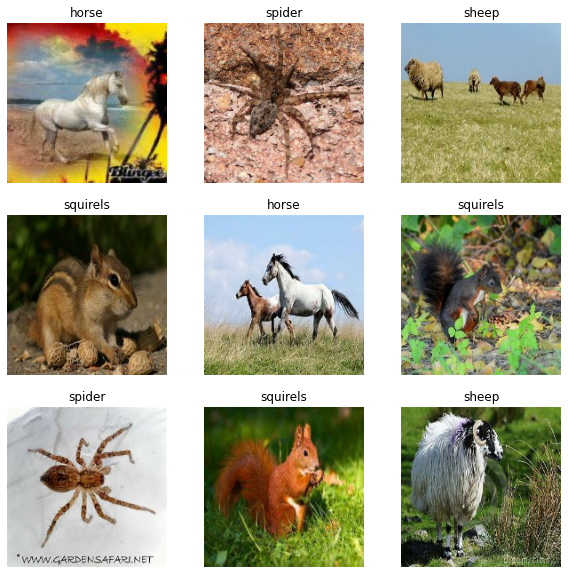

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [15]:
#Configure the dataset for performance

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
#Standardize the data
from tensorflow.keras import layers

In [18]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [19]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [20]:
#Create the model

In [21]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
#Compile the model

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_20 (ModuleWra (None, 180, 180, 3)       0         
_________________________________________________________________
module_wrapper_21 (ModuleWra (None, 180, 180, 16)      448       
_________________________________________________________________
module_wrapper_22 (ModuleWra (None, 90, 90, 16)        0         
_________________________________________________________________
module_wrapper_23 (ModuleWra (None, 90, 90, 32)        4640      
_________________________________________________________________
module_wrapper_24 (ModuleWra (None, 45, 45, 32)        0         
_________________________________________________________________
module_wrapper_25 (ModuleWra (None, 45, 45, 64)        18496     
_________________________________________________________________
module_wrapper_26 (ModuleWra (None, 22, 22, 64)       

In [24]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
71/71 [==============================] - 176s 1s/step - loss: 1.7738 - accuracy: 0.3127 - val_loss: 1.2157 - val_accuracy: 0.5823
Epoch 2/10
71/71 [==============================] - 65s 918ms/step - loss: 1.1807 - accuracy: 0.5390 - val_loss: 1.1480 - val_accuracy: 0.5575
Epoch 3/10
71/71 [==============================] - 64s 897ms/step - loss: 0.9721 - accuracy: 0.6222 - val_loss: 0.9968 - val_accuracy: 0.6230
Epoch 4/10
71/71 [==============================] - 63s 892ms/step - loss: 0.7881 - accuracy: 0.7202 - val_loss: 0.8768 - val_accuracy: 0.6690
Epoch 5/10
71/71 [==============================] - 63s 887ms/step - loss: 0.5719 - accuracy: 0.7995 - val_loss: 0.9148 - val_accuracy: 0.6867
Epoch 6/10
71/71 [==============================] - 62s 884ms/step - loss: 0.4325 - accuracy: 0.8444 - val_loss: 0.9718 - val_accuracy: 0.6761
Epoch 7/10
71/71 [==============================] - 63s 883ms/step - loss: 0.2486 - accuracy: 0.9154 - val_loss: 1.1659 - val_accuracy: 0.6903
E

In [25]:
#Visualize training results

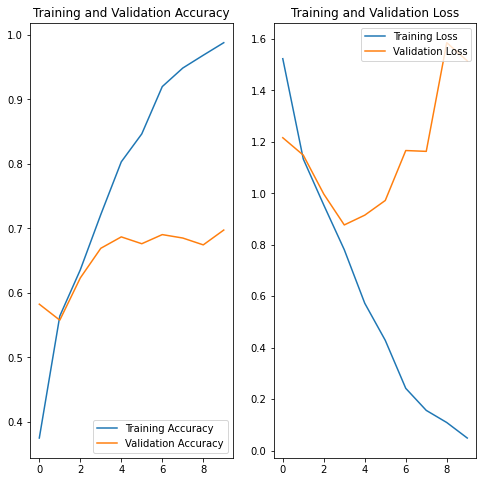

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Overfitting
In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls 
around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is 
noticeable—a sign of overfitting.
When there are a small number of training examples, the model sometimes learns from noises or unwanted details 
from training examples—to an extent that it negatively impacts the performance of the model on new examples. 
This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this ,
we use data augmentation and add Dropout to the model.

In [27]:
#Data augmentation

Data augmentation takes the approach of generating additional training data from 
the  existing examples by augmenting them using random transformations that yield 
believable-looking images. This helps expose the model to more aspects of the data 
and generalize better.

In [28]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

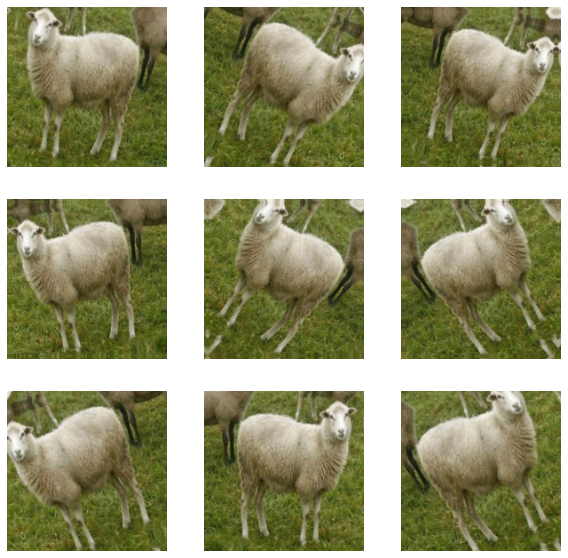

In [29]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [30]:
#Dropout

Another technique to reduce overfitting is to introduce Dropout to the network, a form of regularization.
When we apply Dropout to a layer it randomly drops out (by setting the activation to zero)
a number of output units from the layer during the training process. Dropout takes a fractional 
number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping 
out 10%, 20% or 40% of the output units randomly from the applied layer.

In [31]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
71/71 [==============================] - 82s 1s/step - loss: 1.8910 - accuracy: 0.3300 - val_loss: 1.2708 - val_accuracy: 0.5416
Epoch 2/15
71/71 [==============================] - 75s 1s/step - loss: 1.2709 - accuracy: 0.5048 - val_loss: 1.0498 - val_accuracy: 0.5965
Epoch 3/15
71/71 [==============================] - 75s 1s/step - loss: 1.0874 - accuracy: 0.5714 - val_loss: 1.0780 - val_accuracy: 0.5965
Epoch 4/15
71/71 [==============================] - 76s 1s/step - loss: 1.0101 - accuracy: 0.6268 - val_loss: 0.9826 - val_accuracy: 0.6195
Epoch 5/15
71/71 [==============================] - 75s 1s/step - loss: 0.9463 - accuracy: 0.6307 - val_loss: 0.9137 - val_accuracy: 0.6549
Epoch 6/15
71/71 [==============================] - 75s 1s/step - loss: 0.8827 - accuracy: 0.6740 - val_loss: 0.9221 - val_accuracy: 0.6442
Epoch 7/15
71/71 [==============================] - 75s 1s/step - loss: 0.8625 - accuracy: 0.6551 - val_loss: 0.8703 - val_accuracy: 0.6850
Epoch 8/15
71/71 [==

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
module_wrapper_13 (ModuleWra (None, 180, 180, 3)       0         
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 180, 180, 16)      448       
_________________________________________________________________
module_wrapper_15 (ModuleWra (None, 90, 90, 16)        0         
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, 90, 90, 32)        4640      
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, 45, 45, 32)        0         
_________________________________________________________________
module_wrapper_18 (ModuleWra (None, 45, 45, 64)       

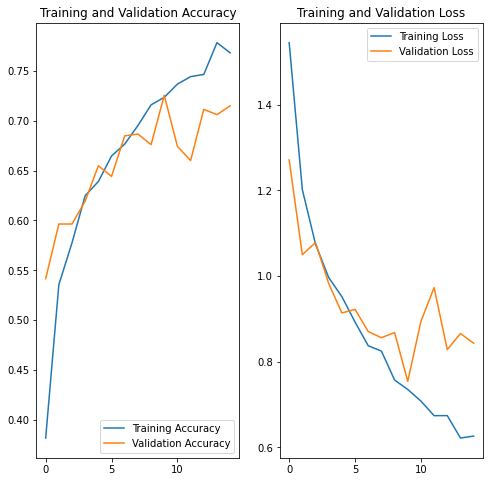

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

After applying data augmentation and Dropout, there is less overfitting than before, 
and training and validation accuracy are closer aligned.

In [36]:
#Predict on new data

In [44]:
image = 'sq.jpeg'

In [45]:
def read_image(file_path):
   # print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(180, 180))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [46]:
imgar=read_image(image)

In [47]:
predictions = model.predict(imgar)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to spider with a 96.30 percent confidence.
